## Measuring Performance ##
In this notebook, we will analyse the behaviour of the parallel crawler for different number of threads.

In [20]:
# necessary imports
import subprocess
import matplotlib.pyplot as plt

In [21]:
num_threads = 10      # Threads from 1 to num_threads
max_size = 100      # Until the SetList gets to max_size
milestones = 8        # and how many milestones along the way to check

link = "https://en.wikipedia.org/wiki/Main_Page"

In [22]:
time_insertion = dict() # dictionary {num_inserted: {num_threads : time (microseconds)} }

subprocess.run(["make", "benchmarker"])

for i in range(1, num_threads):
    time_insertion[i] = dict()
    
    output = subprocess.run(["./benchmarker", link, str(i), str(max_size), str(milestones)], capture_output=True)
    
    for inser_str in output.stdout.decode("utf-8").split('\n'):

        if inser_str == '': continue

        if (len(inser_str.split(' '))) != 2:
            print(inser_str)
            raise AssertionError

        curr_ins, time_i = inser_str.split(' ')
        time_insertion[i][int(curr_ins)] = int(time_i)

subprocess.run(["make", "clean"]);


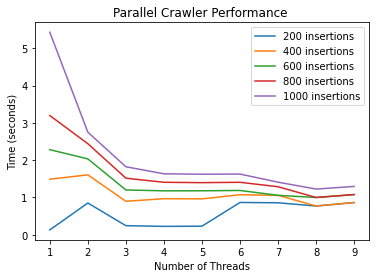

In [14]:
# PLOT HOW PARALLEL CRAWLER PERFORMS ACROSS THREADS 

plt.title("Parallel Crawler Performance ")
plt.xlabel("Number of Threads")
plt.ylabel("Time (seconds)")
insertions_performed = list(time_insertion[1].keys())
for ins in insertions_performed:
    X, Y = [], []
    for (t, t_info) in time_insertion.items():
        X.append(t)
        Y.append(t_info[ins] * 1e-6)
    plt.plot(X, Y, label = f"{ins} insertions")
plt.legend()
plt.show()


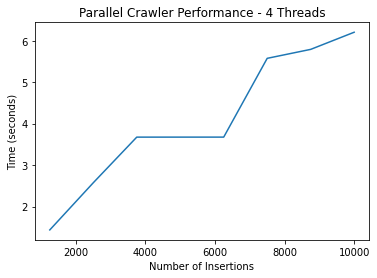

In [19]:
thread_no = 4

# PLOT HOW PARALLEL CRAWLER PERFORMS ACROSS A SNGLE THREAD 

plt.title(f"Parallel Crawler Performance - {thread_no} Threads")
plt.xlabel("Number of Insertions")
plt.ylabel("Time (seconds)")
X, Y = list(time_insertion[thread_no].keys()), list(time_insertion[thread_no].values())
Y = [ 1e-6*t for t in Y ]
plt.plot(X, Y)
plt.show()
